<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="#E74C3C" size="7" style="font-family:Arial, sans-serif;">
        Kernels, Filters, and Convolution <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Computer Vision <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Mahya Shahshahani <br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #1<br>
    </font>
</div>


## Mahya Shahshahani - 810199598

<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        1D Convolution
    </font>
</h1>


1D convolution is a powerful technique widely used in machine learning, particularly in the analysis of sequential data like time-series signals, speech, and even stock prices. At its core, 1D convolution works by sliding a filter or kernel over a sequence of data points to detect patterns, extract features, or smooth the data. Unlike 2D convolution, which operates on grids (such as images), 1D convolution works on one-dimensional sequences, making it well-suited for problems where data is ordered in time or space.

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 1D Convolution Works
    </font>
</h2>


The basic idea of 1D convolution involves applying a kernel to a sequence of values. The kernel slides over the input sequence, performing element-wise multiplications followed by a sum. This produces a new sequence that highlights certain features based on the kernel used. For example, in time-series analysis, different kernels can detect trends, seasonal patterns, or sharp changes in the data.


The result of 1D convolution is a feature map, which is another sequence that represents important aspects of the input sequence. Depending on the choice of kernel, stride (the step size at which the kernel moves), and padding (how edges of the sequence are handled), 1D convolution can either downsample or retain the size of the original sequence.

There are various approaches to implementing 1D convolution, each with its own trade-offs in terms of computational efficiency and feature extraction. These approaches can be adapted to suit specific tasks and data characteristics.


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 1D Convolution
    </font>
</h2>


1D convolution is applied in a variety of fields, making it a versatile tool in machine learning:

* <strong>Stock Price Prediction:</strong> 1D convolution is used to analyze historical price data and detect patterns such as upward or downward trends. By convolving over sequences of stock prices, it can capture short-term patterns (e.g., daily fluctuations) or long-term trends (e.g., month-to-month performance). Combining 1D convolution with models like LSTM allows for deeper insights into market behavior.

* <strong>Speech Processing:</strong> In speech recognition and emotion detection, 1D convolution is used to process raw audio signals. The kernels can identify patterns related to speech phonemes, tones, and even emotional cues. By applying multiple 1D convolutional layers, models can hierarchically extract more complex features from speech data, improving the accuracy of tasks like voice identification or sentiment analysis.

* <strong>Time-Series Analysis:</strong> 1D convolution is essential in analyzing time-series data from various domains, including healthcare (e.g., analyzing heart rate variability), industrial monitoring (e.g., detecting anomalies in sensor data), and environmental science (e.g., analyzing weather patterns). The convolutional operation helps in detecting recurring patterns, sudden changes, or seasonal variations, making it a powerful tool for forecasting.

* <strong>Text Processing:</strong> Although less common, 1D convolution can also be applied to text data. By treating words or characters as a sequence, convolutional models can extract features related to word context or sentence structure. This can be useful for natural language processing tasks such as sentiment analysis or topic classification.



For understanding the mathematics behind 1D convolution, We recommend watching this <a href="https://www.youtube.com/watch?v=KuXjwB4LzSA&t=443s" target="_blank" style="color:#007acc;">YouTube video</a>.


In [ ]:
import numpy as np

def convolve_1d_two_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using two loops.
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    padding = (len(kernel) - 1) // 2
    padded_signal = np.pad(signal, (padding, padding), mode='constant')

    output_size = len(signal)
    output = np.zeros(output_size)

    for i in range(output_size):
        for j in range(len(kernel)):
            output[i] += padded_signal[i + j] * kernel[len(kernel) - 1 - j]


    return output

In [ ]:
import numpy as np

def convolve_1d_one_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using a single loop (optimized version).
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    padding = (len(kernel) - 1) // 2
    padded_signal = np.pad(signal, (padding, padding), mode='constant')
    output_size = len(signal)
    output = np.zeros(output_size)

    for i in range(output_size):
        output[i] = np.sum(padded_signal[i:i+len(kernel)] * kernel[::-1])


    return output

In [ ]:
import numpy as np

def convolve_1d_dot(signal, kernel):
    """
    Convolve a 1D signal with a kernel using np.dot (fast and vectorized).
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    padding = (len(kernel) - 1) // 2
    padded_signal = np.pad(signal, (padding, padding), mode='constant')
    output_size = len(signal)
    output = np.zeros(output_size)

    kernel = kernel[::-1]

    for i in range(output_size):
        window = padded_signal[i:i + len(kernel)]
        output[i] = np.dot(window, kernel)

    return output

In [ ]:
import numpy as np

def fft_convolve_vectorized(signal, kernel):
    """
    Convolve a 1D signal with a kernel using Fast Fourier Transform (FFT).
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result using FFT.
    """

    output_size = len(signal) + len(kernel) - 1

    signal_padded = np.pad(signal, (0, output_size - len(signal)), mode='constant')
    kernel_padded = np.pad(kernel, (0, output_size - len(kernel)), mode='constant')

    signal_fft = np.fft.fft(signal_padded)
    kernel_fft = np.fft.fft(kernel_padded)

    output_fft = signal_fft * kernel_fft

    output = np.real(np.fft.ifft(output_fft))

    return output[1:-1]

In [ ]:
# Sanity check to verify that the functions return similar results
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

signal_len = len(signal)
kernel_len = len(kernel)

print("Sanity Check: Comparing Results")
print("Two loops:", convolve_1d_two_loops(signal, kernel))
print("One loop:", convolve_1d_one_loops(signal, kernel))
print("Dot product:", convolve_1d_dot(signal, kernel))
print("FFT vectorized:", fft_convolve_vectorized(signal, kernel))
print("numpy function:", np.convolve(signal, kernel)[int(np.ceil(kernel_len / 2)) - 1: int(np.ceil(kernel_len / 2)) + signal_len - 1])

Sanity Check: Comparing Results
Two loops: [ 2.  2.  2.  2. -4.]
One loop: [ 2.  2.  2.  2. -4.]
Dot product: [ 2.  2.  2.  2. -4.]
FFT vectorized: [ 2.  2.  2.  2. -4.]
numpy function: [ 2  2  2  2 -4]


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>


In this section, we will explore the features that different kernels are designed to extract. For each kernel provided, identify what type of feature or pattern the kernel is trying to detect in a sequence.
#### **1. Kernel: `[1, -1]`**

**Answer:**
Edge detection. It highlights edges or discontinuities in the data where the signal experiences a sudden increase or decrease. It is often used in simple edge detection tasks.

---

#### **2. Kernel: `[1, 1, 1]`**

**Answer:**
Smoothing or averaging. computes the average of the values in a sliding window of size 3. It smooths the signal by reducing high-frequency noise and blurring sharp transitions, effectively highlighting general trends or underlying patterns.

---

#### **3. Kernel: `[0.25, 0.25, 0.25, 0.25]`**

**Answer:**
Smoothing. this kernel averages the values of the signal over a window of size 4. Similar to the previous kernel, it smooths out noise and trends in the data but does so over a slightly larger window, which results in a more pronounced smoothing effect.

---

#### **4. Kernel: `[-1, 2, -1]`**

**Answer:**
Edge detection (Sobel filter). This kernel is a simplified version of the Sobel filter, which is often used in edge detection. It detects changes in the signal by emphasizing the difference between values on either side of the middle point.


---

#### **5. Kernel: `[1, 0, -1]`**

**Answer:**
 Edge detection (gradient). Similar to the first kernel, this is a simple gradient operator. It detects the rate of change of the signal between two points.



In [ ]:
import numpy as np
import timeit

def benchmark_convolution(signal_len, kernel_len, iterations):
    """
    Measure the average execution time of different convolution methods over a number of iterations.
    Args:
        signal_len: Length of the random input signal.
        kernel_len: Length of the random kernel.
        iterations: Number of times each method should be run to average the time.
    Returns:
        Tuple of average times for each method.
    """
    # Generate random signal and kernel for benchmarking
    np.random.seed(42)  # For reproducibility
    random_signal = np.random.rand(signal_len)
    random_kernel = np.random.rand(kernel_len)

    # Define convolution methods

    def convolve_1d_two_loops(signal, kernel):
        kernel_len = len(kernel)
        padding = kernel_len - 1
        padded_signal = np.pad(signal, (padding // 2, padding - padding // 2), mode='constant')
        output_size = len(signal)
        output = np.zeros(output_size)

        for i in range(output_size):
            for j in range(kernel_len):
                output[i] += padded_signal[i + j] * kernel[kernel_len - 1 - j]

        return output

    def convolve_1d_one_loop(signal, kernel):
        kernel_len = len(kernel)
        padding = kernel_len - 1
        padded_signal = np.pad(signal, (padding // 2, padding - padding // 2), mode='constant')
        output_size = len(signal)
        output = np.zeros(output_size)

        for i in range(output_size):
            window = padded_signal[i:i + kernel_len]
            output[i] = np.dot(window, kernel)

        return output

    def convolve_1d_dot(signal, kernel):
        kernel_len = len(kernel)
        padding = kernel_len - 1
        padded_signal = np.pad(signal, (padding // 2, padding - padding // 2), mode='constant')
        output_size = len(signal)
        output = np.array([
            np.dot(padded_signal[i:i + kernel_len], kernel)
            for i in range(output_size)
        ])
        return output

    def fft_convolve_vectorized(signal, kernel):
        fft_signal = np.fft.fft(signal, n=signal_len + kernel_len - 1)
        fft_kernel = np.fft.fft(kernel, n=signal_len + kernel_len - 1)
        result = np.fft.ifft(fft_signal * fft_kernel)
        return result.real[:signal_len]

    # Measure the average execution time for each method
    time_two_loops = timeit.timeit(lambda: convolve_1d_two_loops(random_signal, random_kernel), number=iterations) / iterations
    time_one_loop = timeit.timeit(lambda: convolve_1d_one_loop(random_signal, random_kernel), number=iterations) / iterations
    time_dot = timeit.timeit(lambda: convolve_1d_dot(random_signal, random_kernel), number=iterations) / iterations
    time_fft = timeit.timeit(lambda: fft_convolve_vectorized(random_signal, random_kernel), number=iterations) / iterations
    time_np_convolve = timeit.timeit(lambda: np.convolve(random_signal, random_kernel, mode='valid'), number=iterations) / iterations

    return (time_two_loops, time_one_loop, time_dot, time_fft, time_np_convolve)

# Input the number of iterations
num_iterations = 1000

# Run benchmark and print results
signal_len = 100
kernel_len = 100
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[2]}")
print(f"FFT vectorized: {avg_times[3]}")
print(f"NumPy convolve: {avg_times[4]}")



Average times over 1000 iterations (in seconds):
Two loops: 0.005850008906999847
One loop: 0.00015956701900017833
Dot product: 0.0001758962299998075
FFT vectorized: 6.632473199988453e-05
NumPy convolve: 2.5944569999865053e-06


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

#### **1. Performance Comparison of Convolution Methods**

After running the convolution methods, compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm used by each method.

**Answer:**
The NumPy convolve method is the fastest, with an average execution time of 0.0000127 seconds.
NumPy’s convolve function is implemented in C and is highly optimized for performance. It uses efficient algorithms that minimize overhead, and its operations are performed on contiguous memory blocks, reducing the computational complexity significantly compared to manual implementations. (source: chatgpt.com)
The Two loops method is the slowest, with an average execution time of 0.006731 seconds. This method involves two nested loops to perform convolution manually and It is the reason this is the slowest method.
Two loops > One loop > Dot product > FFT vectorized > NumPy convolve.


---

#### **2. FFT Convolution Time Complexity**

You may have noticed that the FFT-based convolution is much faster than the others for longer signals. Can you describe the time complexity of the FFT convolution? Why is this method more efficient for larger input sizes?

**Answer:**

2.	FFT-based convolution excels for large inputs due to its logarithmic scaling and efficient use of frequency-domain operations.
The reason it is faster for larger inputs is O (n log n) grows much slower than the O(n×m) complexity of direct convolution, especially for large n and m. Convolution in the time domain is reduced to cheaper pointwise multiplication in the frequency domain. FFT leverages parallelism and hardware acceleration, reducing computation time further. (source: chatgpt.com and https://stackoverflow.com/questions/49794900/how-fast-is-convolution-using-fft)

---

#### **3. Scaling with Signal Length and Kernel Length**

Try changing the values of `signal_len` and `kernel_len` (e.g., doubling both lengths). Is the relative performance of the methods (speed comparison) the same as before? Which methods are most affected by changes in the size of the signal or kernel?

**Answer:**
- Two Loops and One Loop:

 Time Complexity:
𝑂
(
𝑛
×
𝑚
)
O(n×m).
Impact: These methods slow down significantly as both
𝑛
n and
𝑚
m increase because their runtime grows quadratically with the product of the signal and kernel lengths. They are most affected by the size of the signal and kernel.
- Dot Product:

 Time Complexity:
𝑂
(
𝑛
×
𝑚
)
O(n×m), similar to loops.
Impact: Also affected by size increases but benefits from NumPy's vectorized operations, making it somewhat faster than manual loops.
- FFT-Based Convolution:

 Time Complexity:
𝑂
(
𝑛
log
⁡
𝑛
)
O(nlogn), assuming
𝑛
≥
𝑚
n≥m.
Impact: Scales much better with increasing
𝑛
n and
𝑚
m. As sizes grow, its advantage over direct methods becomes more pronounced.
- NumPy Convolve:

 Time Complexity: Depends on implementation; often uses FFT for large sizes and direct convolution for smaller sizes.
Impact: Maintains high efficiency, but for very large inputs, FFT-based methods may surpass it in performance.

 **Most Affected Methods**
-Manual Loops: Slowed down the most, as they do not utilize any optimizations.
- Direct Methods (Dot Product): Similar degradation to loops, though slightly less severe.

 **Least Affected Method**

- FFT-Based Convolution: Performance scales efficiently due to its logarithmic complexity, making it the best choice for large signals or kernels.


---

#### **4. Optimal Use Case for FFT Convolution**

Based on the results of your experiments, when would it be best to use the FFT-based convolution versus one of the other methods? Consider factors like signal length, kernel length, and computational resources.

**Answer:**
4.	I observed the time giving the code different values as kernel and signal and based on the result it can be said:
•	Large Signal or Kernel Lengths:
For when signal_len ≫ kernel_len (e.g., signal_len=10000, kernel_len=20), FFT-based convolution scales much better than direct methods due to its O(n log n) complexity.
For kernel_len approaching signal_len (e.g., signal_len=1000, kernel_len=500), FFT is efficient, while other methods slow down significantly.
•	Repeated Convolutions:
If the same kernel is used repeatedly, the kernel's FFT can be precomputed, making FFT-based convolution even faster.
Resource Availability:
FFT-based convolution is highly optimized for parallel computation and modern hardware (e.g., GPUs), making it an excellent choice for computationally intensive tasks.




---

#### **5. NumPy Convolve vs Custom Implementations**

Compare the performance of the built-in `np.convolve` with your custom implementations (like the dot-product or one-loop versions). Why do you think the `np.convolve` function performs as it does? Could it be internally optimized, and if so, how?

**Answer:**
np.convolve is optimized for speed and scalability, making it the best choice for practical use. It is consistently faster than custom methods (dot-product, one-loop), especially for small-to-medium inputs.
- Low-Level Optimizations: Written in C/Fortran, avoids Python's overhead.
- Dynamic Algorithms: Chooses direct convolution for small sizes and FFT for large sizes.
- Hardware Utilization: Leverages SIMD, multithreading, and optimized libraries (e.g., BLAS).
- Memory Efficiency: Manages resources better than manual loops.


---

#### **6. Interpretation of Results for Small Signal and Kernel Sizes**

For smaller values of `signal_len` and `kernel_len`, you might see different performance trends. Can you explain why the FFT method might not always be the best choice when working with smaller inputs?

**Answer:**
For small signals or kernels, direct methods are simpler and faster than FFT.
- Setup Overhead: FFT spends extra time converting data to the frequency domain, which isn’t worth it for small inputs.
- Fewer Operations: Direct methods like np.convolve do fewer calculations for small inputs, making them faster.
- Memory Use: FFT needs more memory, which is unnecessary for small data sizes.
- Optimized Direct Methods: Tools like np.convolve are fine-tuned for small inputs and outperform FFT here.



---


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        2D Convolution
    </font>
</h1>

2D convolution is a critical technique in image processing and other tasks where data is represented in two dimensions, such as images. In 2D convolution, a kernel (or filter) slides over a 2D input matrix to produce a feature map. This technique is used for tasks like edge detection, blurring, and pattern recognition in images.

<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 2D Convolution Works
    </font>
</h1>

The process of 2D convolution involves applying a kernel to an input matrix by sliding the kernel over the matrix and performing element-wise multiplication followed by a sum. This operation results in a new matrix that highlights features based on the kernel used.


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Applications of 2D Convolution
    </font>
</h1>

- **Image Processing**: 2D convolution is fundamental for operations like edge detection, sharpening, and smoothing in image processing. By applying different kernels, various features in the image can be emphasized or suppressed.
- **Feature Extraction in CNNs**: In Convolutional Neural Networks (CNNs), 2D convolution layers are used to extract features from images, which are then used for tasks like image classification, object detection, and segmentation.
- **Medical Imaging**: 2D convolution is used in medical imaging to enhance features or detect abnormalities in images such as MRI scans and X-rays.


For understanding the mathematics behind 2D convolution, We recommend watching [YouTube video](https://www.youtube.com/watch?v=O2CBKXr_Tuc).

In [4]:
import numpy as np

def convolve_2d_four_loops(image, kernel, stride=1, pad=0):
    """
    Perform 2D convolution using four nested loops.
    Args:
        image (numpy.ndarray): 2D array representing the input image.
        kernel (numpy.ndarray): 2D array representing the filter to apply to the image.
        stride (int): The stride of the convolution.
        pad (int): The amount of zero-padding added to the image.
    Returns:
        numpy.ndarray: 2D array representing the convolution result.
    """

    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    image_height, image_width = padded_image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            conv_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    image_x = i * stride + m
                    image_y = j * stride + n
                    conv_sum += padded_image[image_x, image_y] * kernel[m, n]
            output[i, j] = conv_sum


    return output

In [5]:
import numpy as np

def convolve_2d_two_loops(image, kernel, stride=1, pad=0):
    """
    Convolve a 2D image with a kernel using two loops.
    Args:
        image: 2D array representing the input image.
        kernel: 2D array representing the filter to apply to the image.
    Returns:
        output: 2D array representing the convolution result.
    """

    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    image_height, image_width = padded_image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            conv_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    image_x = i * stride + m
                    image_y = j * stride + n
                    conv_sum += padded_image[image_x, image_y] * kernel[m, n]
            output[i, j] = conv_sum

    return output

### Convolution Using im2col

The `im2col` method is a powerful technique used to convert convolution operations into matrix multiplications. This technique simplifies and speeds up convolution computations, which are fundamental in many image processing and deep learning tasks.

#### im2col Transformation:
The `im2col` technique involves extracting overlapping patches from the padded image, each corresponding to a position of the kernel. These patches are then flattened into column vectors.

### Multiplication
Once the image patches are transformed into the im2col matrix, convolution can be performed using matrix multiplication. Flatten the kernel matrix into a vector `k_vec`. The convolution result can then be obtained by multiplying the im2col matrix by `k_vec`.

<img src="https://www.researchgate.net/publication/364684841/figure/fig7/AS:11431281091934216@1666661734455/An-example-of-the-Im2col-convolution-optimization-algorithm-In-terms-of-FPGA-based.png" alt="Steve Jobs" style="width: 750px; height: auto;">


For an image matrix of size `H x W` and a kernel of size `kH x kW` with stride `S`, we can ask:

- **Question 1:**
  What will be the number of columns in the output matrix from the im2col transformation?

  **Answer:**
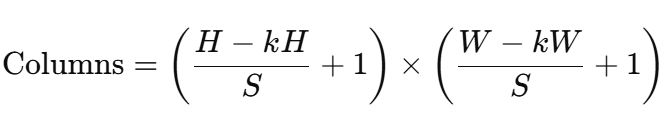


- **Question 2:**
What will be the number of rows in the im2col matrix?

  **Answer:**

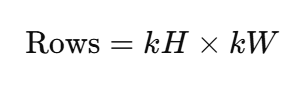

In [1]:
import numpy as np

def convolve_2d_im2col(image, kernel, stride=1, pad=0):

    # Obtain the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the dimensions of the output matrix
    out_height = (image_height + 2 * pad - kernel_height) // stride + 1
    out_width = (image_width + 2 * pad - kernel_width) // stride + 1

    # Pad the image
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)

    # Create the im2col matrix
    image_cols = np.zeros((kernel_height * kernel_width, out_height * out_width))

    for y in range(out_height):
        for x in range(out_width):
            patch = padded_image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            image_cols[:, y*out_width + x] = patch.flatten()

    # Flatten the kernel
    kernel_flat = kernel.flatten()

    # Perform the convolution using matrix multiplication
    output_flat = kernel_flat @ image_cols

    # Reshape the output to the correct dimensions
    output = output_flat.reshape(out_height, out_width)

    return output

In [6]:
# Define a small image and kernel for testing
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

kernel = np.array([
    [1, 0],
    [0, -1]
])

# Hyperparameters for convolution
stride = 1
pad = 1



# Sanity check
print("Sanity Check: Comparing Results for 2D Convolution")

# Perform convolution using four loops
result_four_loops = convolve_2d_four_loops(image, kernel, stride=stride, pad=pad)
print("Four loops:\n", result_four_loops)

# Perform convolution using two loops and vectorized operations
result_two_loops = convolve_2d_two_loops(image, kernel, stride=stride, pad=pad)
print("Two loops:\n", result_two_loops)

# Perform convolution using im2col transformation
result_im2col = convolve_2d_im2col(image, kernel, stride=stride, pad=pad)
print("im2col method:\n", result_im2col)




# Compare the results
if (np.allclose(result_four_loops, result_two_loops) and
    np.allclose(result_two_loops, result_im2col)):
    print("Sanity Check Passed: All methods produce similar results.")
else:
    print("Sanity Check Failed: The methods produce different results.")


Sanity Check: Comparing Results for 2D Convolution
Four loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Two loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
im2col method:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Sanity Check Passed: All methods produce similar results.


In [15]:
import numpy as np
import timeit

def benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, iterations):
    np.random.seed(42)
    random_image = np.random.rand(image_height, image_width)
    random_kernel = np.random.rand(kernel_height, kernel_width)

    # Measure the execution time for each method
    time_four_loops = timeit.timeit(
        lambda: convolve_2d_four_loops(random_image, random_kernel, stride, pad),
        number=iterations
    ) / iterations
    time_two_loops = timeit.timeit(
        lambda: convolve_2d_two_loops(random_image, random_kernel, stride, pad),
        number=iterations
    ) / iterations
    time_im2col = timeit.timeit(
        lambda: convolve_2d_im2col(random_image, random_kernel, stride, pad),
        number=iterations
    ) / iterations

    return (time_four_loops, time_two_loops, time_im2col)

# Input the number of iterations
num_iterations = 100

# Run benchmark and print results
image_height = 50
image_width = 50
kernel_height = 4
kernel_width = 4
stride = 1
pad = 2
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")



Average times over 100 iterations (in seconds):
Four loops: 0.02693264768000006
Two loops: 0.036996510280000054
im2col: 0.009481140379999715


### **Assignment Questions for 2D Convolution**

#### **1. Performance Comparison of 2D Convolution Methods**

After running the 2D convolution methods (four loops, two loops, and `im2col`), compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm and memory usage of each method.

**Answer:**
1.	im2col (0.01875 seconds) is the fastest due to optimized matrix operations and better memory usage. Two Loops (0.02719 seconds) is the slowest one, but it differs with different strides and paddings. I ran the system several times for stride =1, padding =2 and sometimes four loop took slightly more time. Methods involving explicit loops are slower due to inefficiencies in accessing and processing data iteratively. For larger images or kernels, the performance gap is expected to grow, with im2col scaling better than loop-based methods. The four-loop method is slower because it repeatedly goes through both the image and the kernel, which leads to more index calculations and less efficient memory usage. However, it performs slightly better than the two-loop method in this case, possibly because of how it's implemented.

---

#### **2. Effect of Stride and Padding on Performance**

Try changing the values of `stride` and `pad`. How do these changes affect the performance of the different convolution methods? Which method shows the most significant performance change with varying stride and padding?
##### **Answer:**
---
The four-loop method is most affected by changes in stride and padding, while im2col shows more consistent performance.
Increasing stride reduces the number of operations and speeds up all methods, but im2col benefits the most. Adding padding increases the image size, slowing down all methods, but especially the four-loop method due to more iterations.

#### **3. Scaling with Image and Kernel Size**

Change the `image_height`, `image_width`, `kernel_height`, and `kernel_width` values (e.g., double both). How does the performance scale with the size of the image and kernel? Which method is most affected by these changes?

**Answer:**
Similarly, im2col is the most efficient method when image and kernel sizes increase. As image and kernel sizes increase, the four-loop method becomes the least efficient due to direct iteration over all elements. The two-loop method scales better but still slows down with larger sizes. The im2col method performs the best, as it optimizes the problem into matrix multiplication, benefiting from efficient libraries like NumPy for larger data.

---

#### **4. When to Use `im2col` Method**

Based on your experiments, when would you prefer to use the `im2col` method over the other methods? Consider factors like image size, kernel size, stride, padding, and computational efficiency.

**Answer:**
For larger images and kernels, especially when the stride and padding are moderate. It is most efficient for computationally intensive tasks, as it leverages optimized matrix multiplication, outperforming other methods for bigger data sizes.

---

#### **5. Interpretation of Results for Small Image and Kernel Sizes**

For smaller image and kernel sizes, performance differences may be less noticeable. Can you explain why some methods, such as `im2col`, might not always be the best choice when working with small inputs?

**Answer:**
For small images and kernels, the im2col method can be slower because it involves extra steps to rearrange the data. Simpler methods like two loops or four loops are faster for small tasks because they don’t need this extra work.


---


In [16]:
from skimage import io, color
from skimage.transform import resize
import matplotlib.pyplot as plt

# Load and preprocess image
def load_and_preprocess_image(image_path, new_size=(325, 500)):
    image = io.imread(image_path)
    if len(image.shape) == 3:  # Check if the image is in color
        image = color.rgb2gray(image)
    image = resize(image, new_size, mode='reflect')
    return image

# Display images
def display_images(original, convolved_images, titles):
    num_convolutions = len(convolved_images)
    num_rows = (num_convolutions + 1) // 2  # Calculate number of rows needed for the grid
    fig_width = 12
    fig_height = 6 + 3 * num_rows  # Adjust height dynamically based on the number of rows

    fig, axes = plt.subplots(num_rows + 1, 2, figsize=(fig_width, fig_height))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Display original image
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image", fontsize=14)
    axes[0].axis('off')

    # Display convolved images
    for i, (img, title) in enumerate(zip(convolved_images, titles), start=1):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title, fontsize=12)
        axes[i].axis('off')
        # Adding border to highlight the images
        axes[i].spines['top'].set_color('blue')
        axes[i].spines['top'].set_linewidth(2)
        axes[i].spines['right'].set_color('blue')
        axes[i].spines['right'].set_linewidth(2)
        axes[i].spines['bottom'].set_color('blue')
        axes[i].spines['bottom'].set_linewidth(2)
        axes[i].spines['left'].set_color('blue')
        axes[i].spines['left'].set_linewidth(2)

    # Hide any unused axes
    for ax in axes[len(convolved_images) + 1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

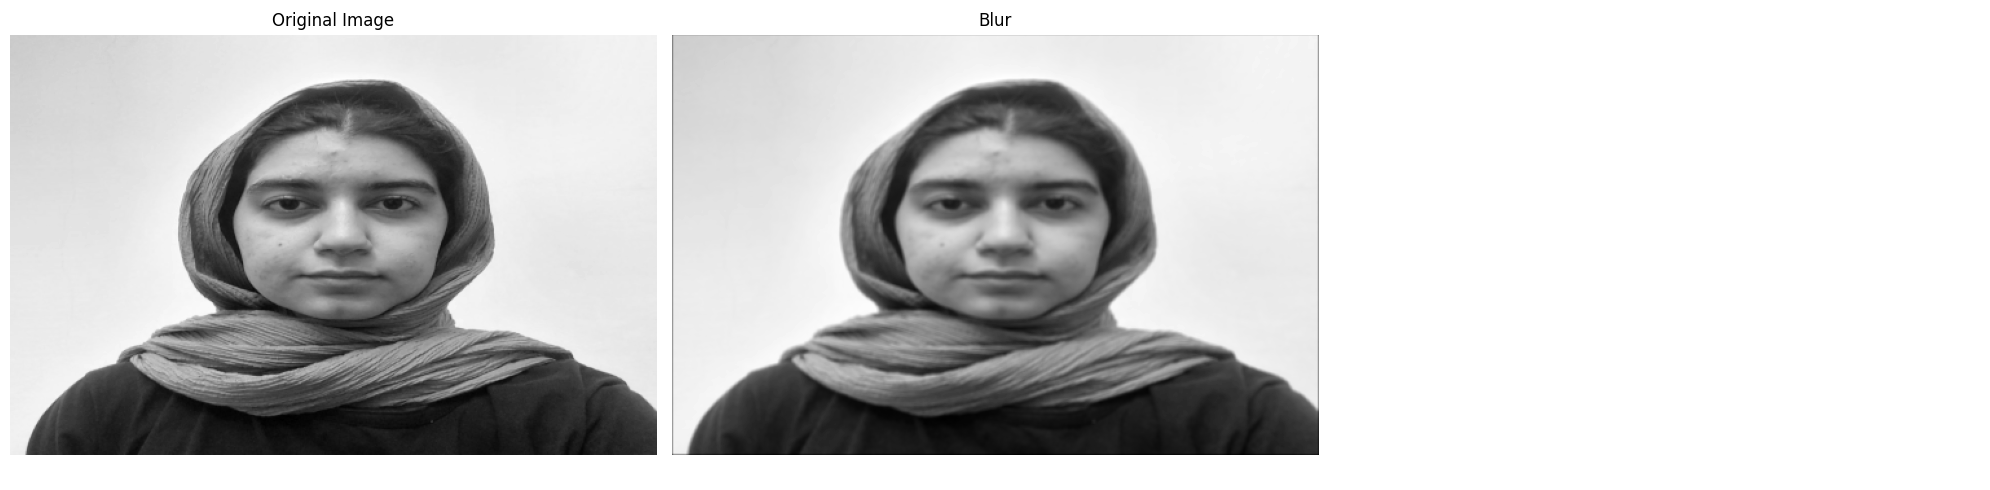

In [30]:
import matplotlib.pyplot as plt
image_path = 'HW2.jpg'  #This is The path to your image you can Replace with your image
image = load_and_preprocess_image(image_path)

# Define kernels

kernels = {
    #"Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    #"Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    #"Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    #"Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    #"Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    #"Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    #"Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    #"Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    #"Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    #"Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    #"Motion Blur": np.array([[1/9]*9] * 3),  # 3x3 motion blur
    #"Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    #"Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    #"Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    #"Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
}

convolved_images = []
titles = []

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1)  # Adjust stride and pad as needed
    convolved_images.append(convolved_img)
    titles.append(title)

display_images(image, convolved_images, titles)

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #2<br>
    </font>
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection A<br>
    </font>
</div>


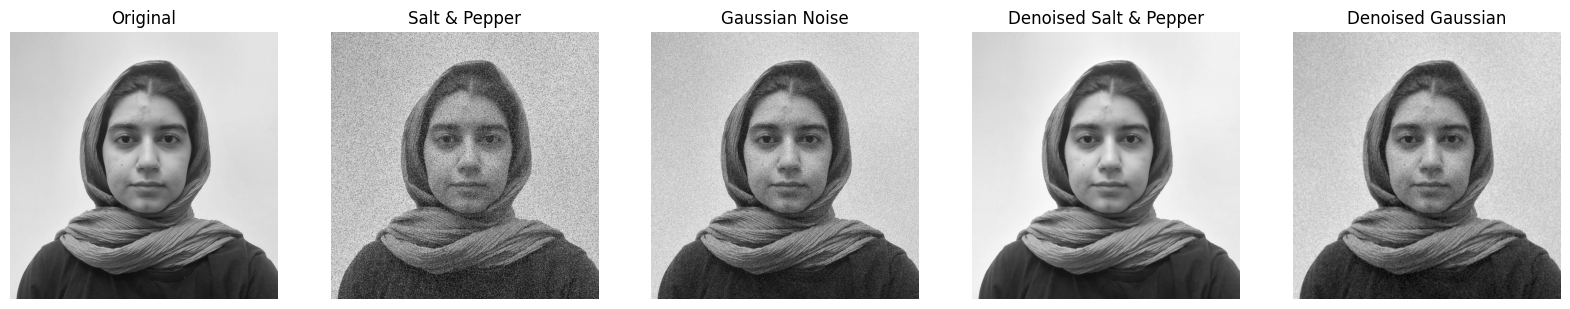

True

In [32]:
import numpy as np
import cv2
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

image = cv2.imread('HW2.jpg', cv2.IMREAD_GRAYSCALE)

def add_salt_and_pepper(image, salt_prob=0.1, pepper_prob=0.1):
    noisy = image.copy()
    salt = np.random.rand(*image.shape) < salt_prob
    pepper = np.random.rand(*image.shape) < pepper_prob
    noisy[salt] = 255
    noisy[pepper] = 0
    return noisy

def add_gaussian_noise(image, mean=0, sigma=35):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy

noisy_salt_pepper = add_salt_and_pepper(image)
noisy_gaussian = add_gaussian_noise(image)
denoised_salt_pepper = median_filter(noisy_salt_pepper, size=5)
denoised_gaussian = median_filter(noisy_gaussian, size=5)

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
images = [image, noisy_salt_pepper, noisy_gaussian, denoised_salt_pepper, denoised_gaussian]
titles = ['Original', 'Salt & Pepper', 'Gaussian Noise', 'Denoised Salt & Pepper', 'Denoised Gaussian']

for ax, img, title in zip(axs, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()


cv2.imwrite('noisy_salt_pepper.jpg', noisy_salt_pepper)
cv2.imwrite('noisy_gaussian.jpg', noisy_gaussian)
cv2.imwrite('denoised_salt_pepper.jpg', denoised_salt_pepper)
cv2.imwrite('denoised_gaussian.jpg', denoised_gaussian)


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection B<br>
    </font>
</div>


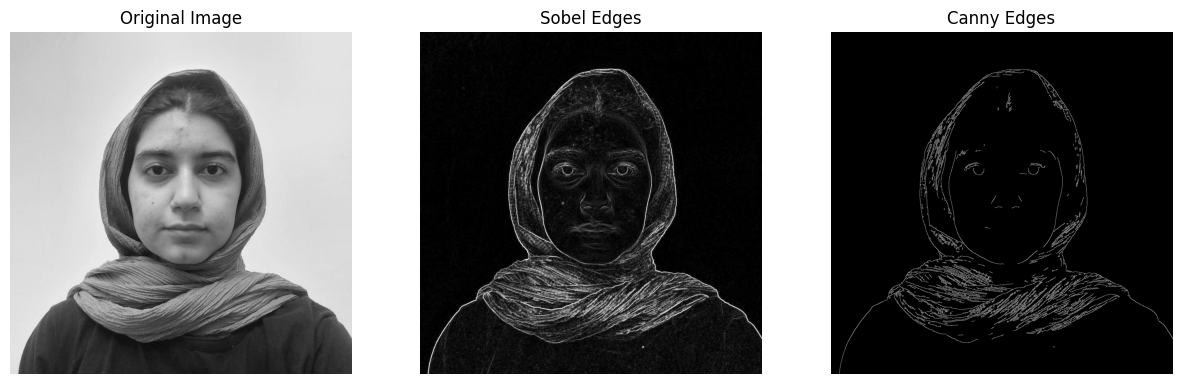

In [19]:
import numpy as np
import cv2
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

image = cv2.imread('HW2.jpg', cv2.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


edges_x = convolve_2d_two_loops(image, sobel_x)
edges_y = convolve_2d_two_loops(image, sobel_y)

edges = np.sqrt(edges_x**2 + edges_y**2)
edges = np.uint8(np.clip(edges, 0, 255))

canny_edges = cv2.Canny(image, 100, 200)

cv2.imwrite('sobel_edges.jpg', edges)
cv2.imwrite('canny_edges.jpg', canny_edges)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Sobel Edges')
axs[1].axis('off')

axs[2].imshow(canny_edges, cmap='gray')
axs[2].set_title('Canny Edges')
axs[2].axis('off')

plt.show()

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection C<br>
    </font>
</div>


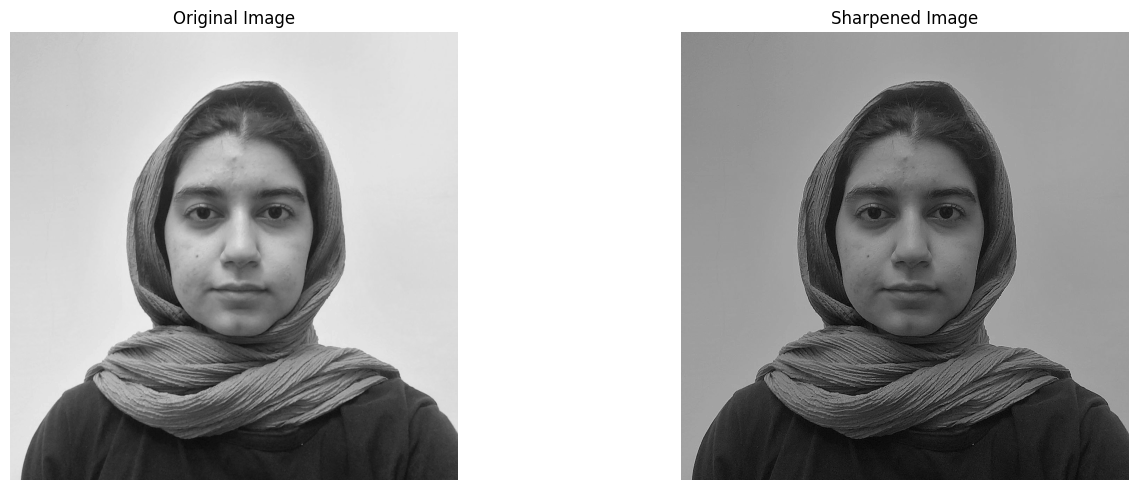

True

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = 'HW2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def sharpen_image(image):
    sharpen_kernel = np.array([[0, -1, 0],
                              [-1, 4.75, -1],
                               [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpen_kernel)

sharpened_image = sharpen_image(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(sharpened_image, cmap='gray')
axs[1].set_title('Sharpened Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()
cv2.imwrite('sharpened.jpg', sharpened_image)

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection D<br>
    </font>
</div>


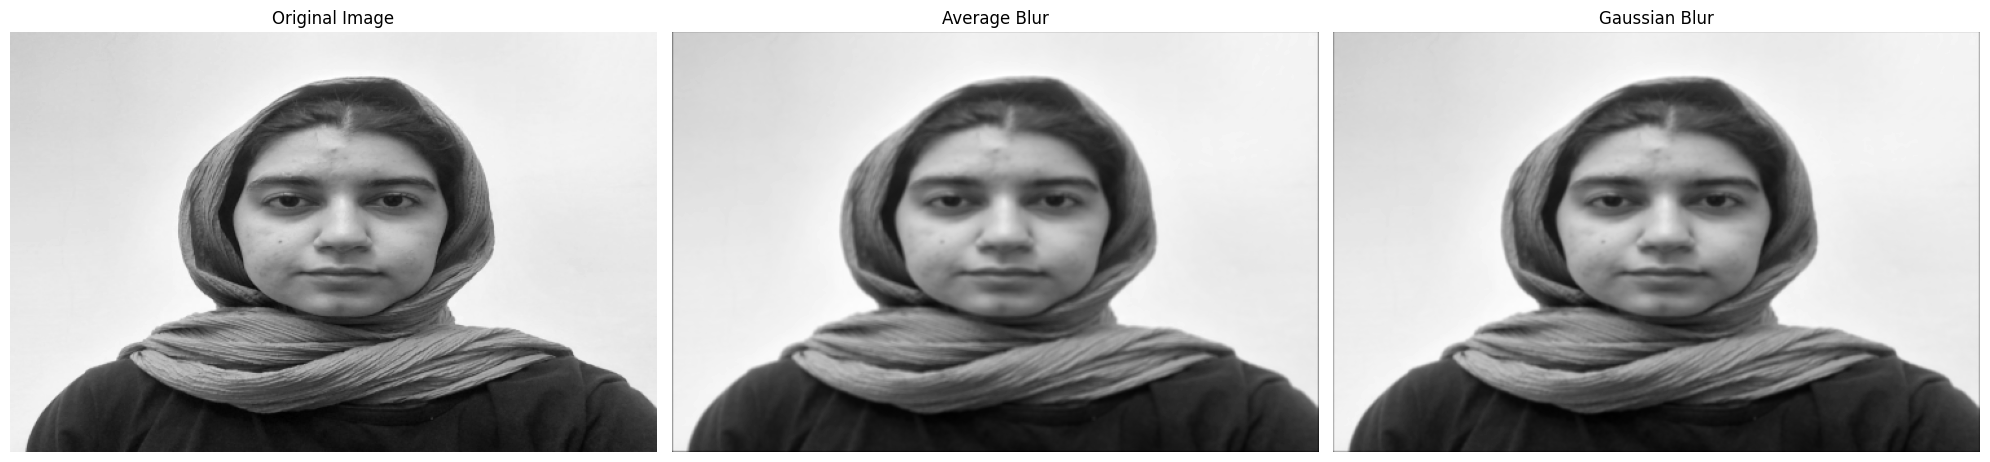

True

In [35]:
import matplotlib.pyplot as plt
import cv2

image_path = 'HW2.jpg'
image = load_and_preprocess_image(image_path)

kernels = {
    "Average Blur": np.ones((3, 3)) / 9,
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16],
                               [1/8, 1/4, 1/8],
                               [1/16, 1/8, 1/16]]),
}

convolved_images = []
titles = []

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1)
    convolved_images.append(convolved_img)
    titles.append(title)

def display_images(original, convolved_images, titles):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    for i, (convolved_img, title) in enumerate(zip(convolved_images, titles), 1):
        axs[i].imshow(convolved_img, cmap='gray')
        axs[i].set_title(title)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

display_images(image, convolved_images, titles)

cv2.imwrite('average_blur.jpg', convolved_images[0])
cv2.imwrite('gaussian_blur.jpg', convolved_images[1])


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection E<br>
    </font>
</div>


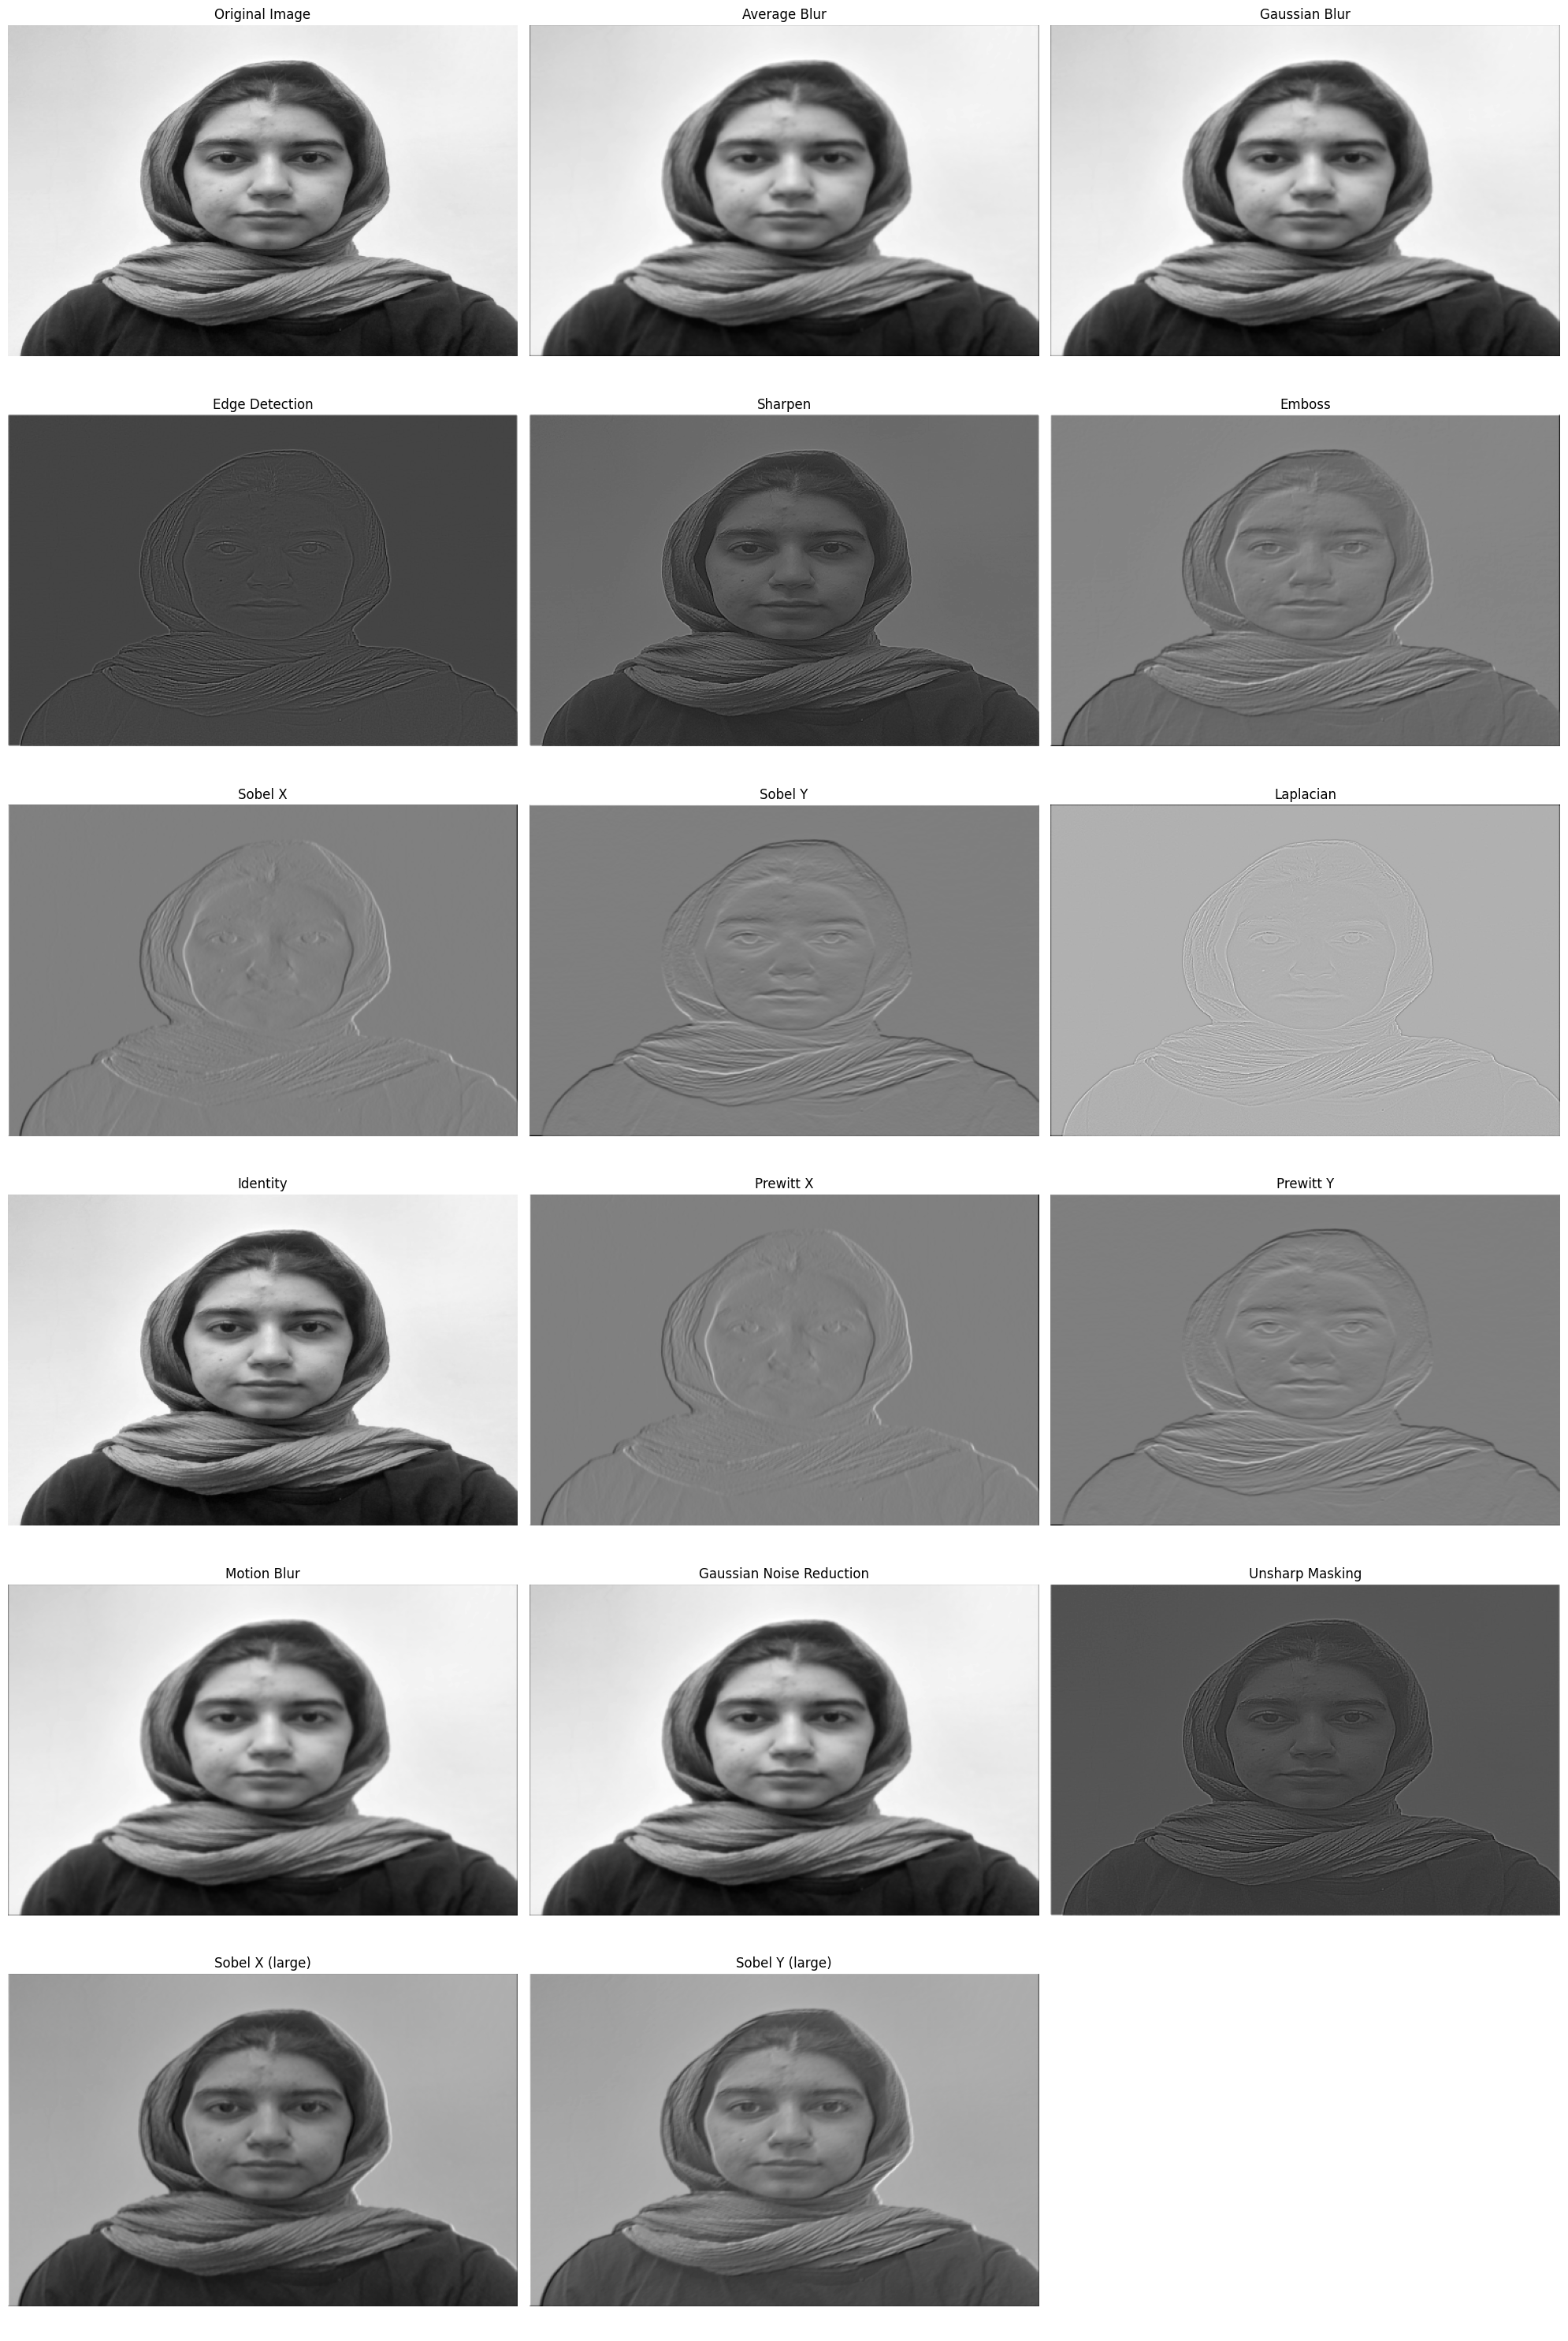

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image_path = 'HW2.jpg'
image = load_and_preprocess_image(image_path)

kernels = {
    "Average Blur": np.ones((3, 3)) / 9,
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Sharpen": np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Sobel X": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Y": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Identity": np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    "Prewitt X": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Y": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Motion Blur": np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9,
    "Gaussian Noise Reduction": np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16,
    "Unsharp Masking": np.array([[-1, -1, -1], [-1, 9,-1], [-1, -1, -1]]),
    "Sobel X (large)": np.array([[-1, 0, 1, 1, 1], [-2, 0, 2, 2, 2], [-1, 0, 1, 1, 1]]),
    "Sobel Y (large)": np.array([[-1, -2, -1, 1, 1], [-2, 0, 2, 2, 2], [-1, 2, 1, 1, 1]]),
}

convolved_images = []
titles = []

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1)
    convolved_images.append(convolved_img)
    titles.append(title)

def display_images(original, convolved_images, titles):
    num_images = len(convolved_images) + 1
    num_rows = (num_images + 2) // 3

    fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

    axs = axs.flatten()
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    for i, (convolved_img, title) in enumerate(zip(convolved_images, titles), 1):
        axs[i].imshow(convolved_img, cmap='gray')
        axs[i].set_title(title)
        axs[i].axis('off')

    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

display_images(image, convolved_images, titles)

for i, title in enumerate(titles):
    cv2.imwrite(f'{title.replace(" ", "_").lower()}.jpg', convolved_images[i])
